In [250]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences
from scipy.ndimage import gaussian_filter1d
from scipy.stats import landau

In [251]:
def load_pmt(input_file,pmtname, minnpe = 0., top_bottom_coinc = False):
    pmt_bottom_condition = "pmt4 >= 0"
    if(top_bottom_coinc): pmt_bottom_condition = "pmt4 >= 10" 
    data=pd.read_csv(input_file, sep ='\t',header=None)
    data.columns = ["r","phi", "pmt1_em", "pmt1_mu", "pmt2_em", "pmt2_mu","pmt3_em", "pmt3_mu","pmt4_em", "pmt4_mu"]
    tank_r = data['r']
    pmt_em = data[pmtname+'_em']
    pmt_mu = data[pmtname+'_mu']

    pmt_mu = np.asarray(pmt_mu[pmt_mu >= minnpe])
    pmt_em = np.asarray(pmt_em[pmt_em >= minnpe])
    pmt_tot = np.concatenate((pmt_mu,pmt_em))
    
    return tank_r, pmt_em, pmt_mu, pmt_tot


In [252]:
input_file = '/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/output/PEPS_SHOWER_3'

tank_r, pmt1_em, pmt1_mu, pmt1_tot = load_pmt(input_file,'pmt1')
tank_r, pmt4_em, pmt4_mu, pmt4_tot = load_pmt(input_file,'pmt4')


Text(0, 0.5, 'Entries')

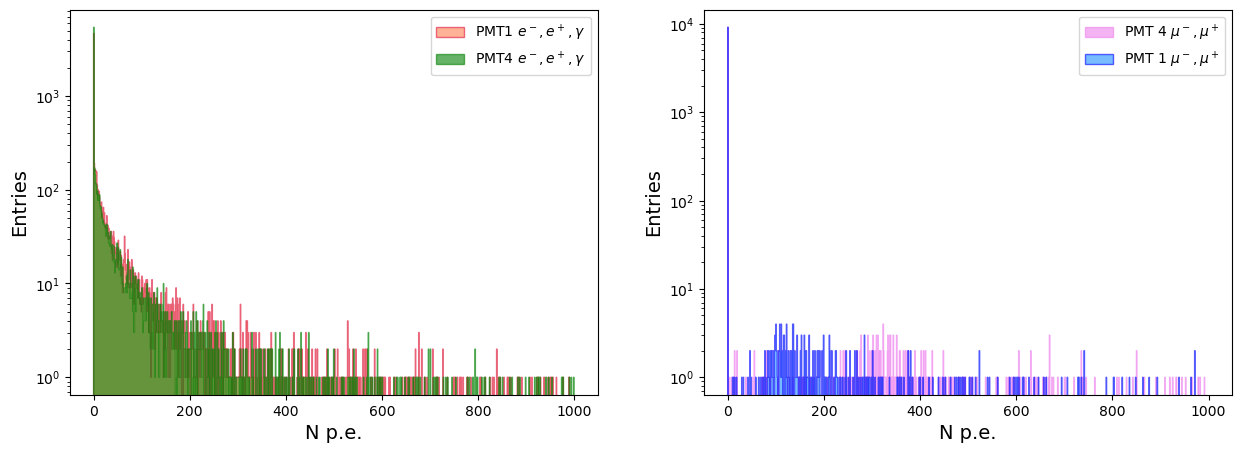

In [253]:
pe_bins = np.arange(0,1000,1)

plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(pmt1_em, bins=pe_bins,color = 'coral', edgecolor='crimson', histtype= "stepfilled", alpha=0.6, label=r'PMT1 $e^-, e^+, \gamma$')
plt.hist(pmt4_em, bins=pe_bins,color = 'green', edgecolor='green', histtype= "stepfilled", alpha=0.6, label=r'PMT4 $e^-, e^+, \gamma$')
#plt.hist(pmt1_mu, bins=pe_bins, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'$\mu^-, \mu^+$')

#plt.xlim(0,300)
plt.legend(title = '')
plt.yscale('log')
plt.xlabel('N p.e.',size=14)
plt.ylabel('Entries',size=14)

plt.subplot(1,2,2)
plt.hist(pmt4_mu, bins=pe_bins,color = 'violet', edgecolor='violet', histtype= "stepfilled", alpha=0.6, label=r'PMT 4 $\mu^-, \mu^+$')
plt.hist(pmt1_mu, bins=pe_bins, color = 'dodgerblue', edgecolor='blue', histtype= "stepfilled", alpha=0.6, label=r'PMT 1 $\mu^-, \mu^+$')

#plt.xlim(0,300)
plt.legend(title = '')
plt.yscale('log')
plt.xlabel('N p.e.',size=14)
plt.ylabel('Entries',size=14)


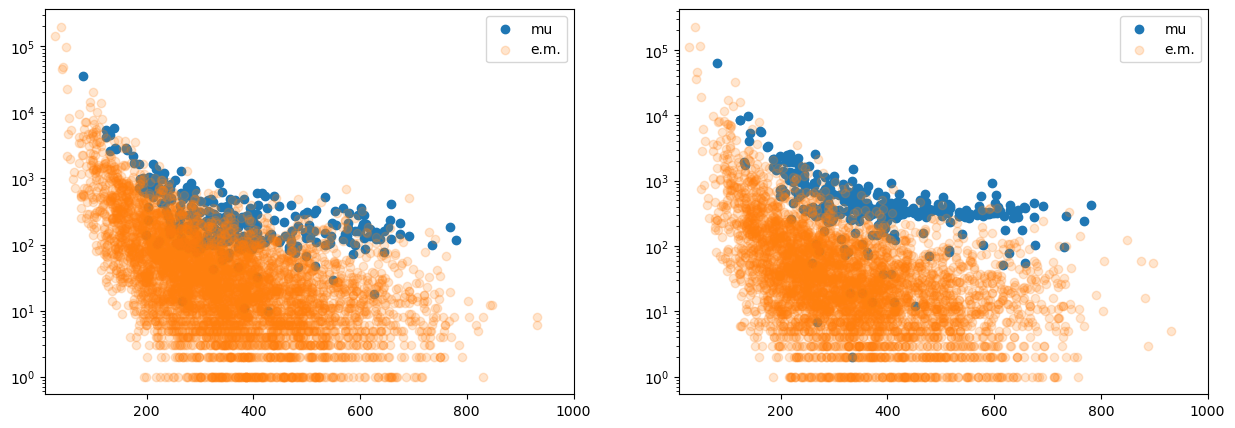

In [254]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(tank_r, pmt1_mu,label='mu')
plt.scatter(tank_r, pmt1_em,label='e.m.',alpha=0.2)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(10,1e3)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(tank_r, pmt4_mu,label='mu')
plt.scatter(tank_r, pmt4_em,label='e.m.',alpha=0.2)
plt.xscale('linear')
plt.yscale('log')
plt.xlim(10,1e3)
plt.legend()

9500
352
9500
5630


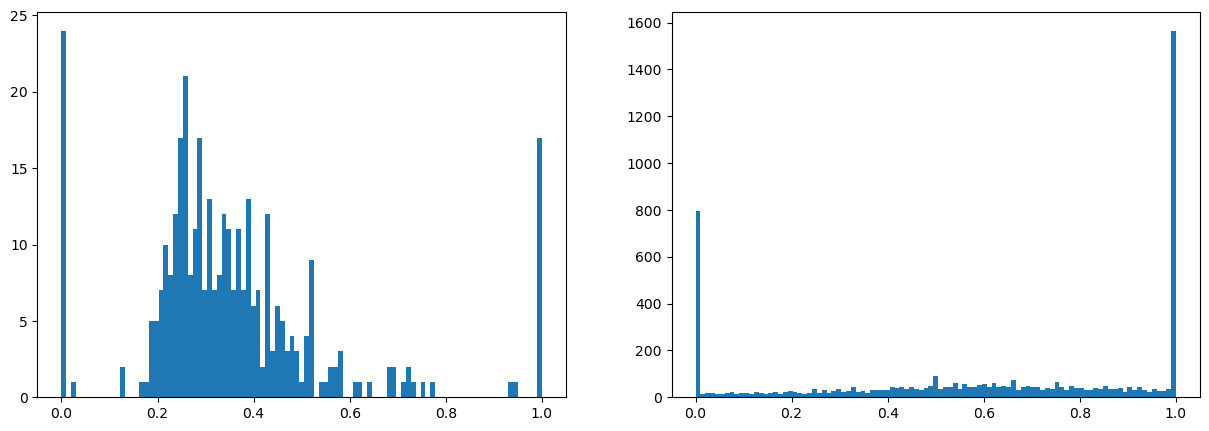

In [ ]:
pmt_tot_mu = pmt4_mu + pmt1_mu 
mu_signal_mask = pmt_tot_mu > 0.

pmt_tot_em = pmt4_em + pmt1_em 
em_signal_mask = pmt_tot_em > 0.
print(len(pmt1_mu))
print(len(pmt1_mu[mu_signal_mask]))
print(len(pmt1_em))
print(len(pmt1_em[em_signal_mask]))

plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(pmt1_mu[mu_signal_mask] / (pmt_tot_mu[mu_signal_mask]),bins=np.linspace(0,1,100), label='muon')
plt.yscale('linear')

plt.subplot(1,2,2)
plt.hist(pmt1_em[em_signal_mask] / (pmt_tot_em[em_signal_mask]),bins=np.linspace(0,1,100),label='e.m.')
plt.yscale('log')